In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import os
from glob import glob


In [123]:
# read the existing table: 

table = pd.read_csv('/Users/varyabazilova/Desktop/alluvial_fans/dem_all/all_points_so_far/11_zonalstats_new/table_catchemnts_from_qgis.csv', index_col = 0)


In [124]:
table = table.drop('geometry', axis = 1)

In [125]:
table.drop_duplicates()

,DN,Name,x_centroid,y_centroid,area_m,perimeter,glaciersum,mean_elevation,median_elevation,std_elevation,...,median_slope,std_slope,min_slope,max_slope,range_slope,variance_slope,glarea_percent,glacier,x_wgs,y_wgs
0,2,DF,6533932.497,-500205.440,323908.568,3584.675,0.000,4738.964789,4764.5,184.324936,...,31.014997,13.757275,4.778122,73.454002,68.675880,189.262607,0.00000,0,85.622,28.207
1,3,DF,6534113.836,-500799.045,182483.700,2922.889,0.000,4568.158333,4594.5,148.640450,...,39.340778,15.463210,3.026158,69.205093,66.178936,239.110864,0.00000,0,85.617,28.205
2,4,DF,6533894.325,-503821.445,205294.163,2702.293,0.000,4182.414815,4179.0,149.451064,...,35.895067,7.670293,12.046069,49.839001,37.792932,58.833395,0.00000,0,85.591,28.205
3,5,"Mixed - new looks FF, vegetated DF",6531952.768,-502250.739,8413968.867,19907.851,2763.123,4867.525384,4886.5,386.837657,...,22.464617,11.392533,0.367312,59.196445,58.829133,129.789809,0.03284,1,85.603,28.226
4,7,FF - lower lef DF remnants?,6535837.722,-503989.910,359644.959,3750.121,0.000,4346.589852,4321.0,195.953906,...,37.269485,9.572366,6.219843,58.032841,51.812997,91.630189,0.00000,0,85.591,28.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,80,DF,5907050.424,-1195549.440,1284828.337,6069.585,0.000,5628.424171,5622.0,190.356445,...,30.490745,8.150022,0.734205,46.768581,46.034376,66.422860,0.00000,0,78.558,33.661
738,81,DF,5908114.850,-1195174.890,2358816.953,9545.802,0.000,5394.825105,5370.0,290.575365,...,28.011948,9.799224,3.629467,45.558247,41.928779,96.024781,0.00000,0,78.564,33.652
739,82,DF,5908413.450,-1193969.040,2622176.316,10483.829,0.000,5583.418578,5611.0,316.972253,...,31.531179,9.243599,1.038266,47.614628,46.576362,85.444130,0.00000,0,78.576,33.651
740,83,DF,5909758.971,-1193073.120,3833933.847,10870.075,0.000,5311.430018,5253.0,347.465894,...,28.144108,9.897736,1.468170,47.641434,46.173264,97.965173,0.00000,0,78.586,33.639


### morphometric parameters from tjalling's book chapter 



In [7]:
# ruggedness ratio
# Rh = Rd * H (H = range elevation) - requires length of the drainage 


In [8]:
# melton index 
# M = H *A**0.5 (H = range elevation)

table['M'] = table.range_elevation * (table.area_m ** 0.5)

In [9]:
# circularity ratio
# Rc = 4piA/P^2
# numpy.pi#


table['Rc'] = (4 * np.pi * table.area_m ) / (table.perimeter ** 2)

In [10]:
# compactness coefficient  
# Cc = 0.2841* (P/A**0.5)

table['Cc'] = 0.2841 * (table.perimeter / (table.area_m**0.5))



In [11]:
# delete geometry

# table = table.drop('geometry', axis =1)

In [12]:
# table.to_csv('morphometrical_params.csv')

## correlations and some related plots

In [13]:
table_sub = table[['Name', 'x_centroid', 'y_centroid', 'area_m', 'perimeter',
       'glaciersum', 'mean_elevation', 'std_elevation',
       'min_elevation', 'max_elevation', 'range_elevation',
       'variance_elevation','region', 'mean_slope',
       'median_slope', 'std_slope', 'min_slope', 'max_slope', 'range_slope',
       'variance_slope', 'glarea_percent', 'glacier', 'Rc',
       'Cc', 'M']]

table_sub_corr = table_sub.corr()


Text(0.5, 1.0, 'various parameters')

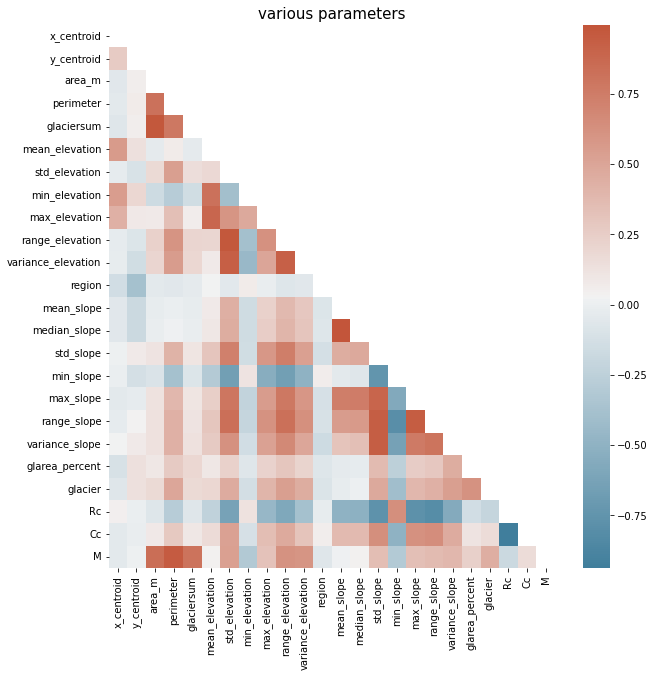

In [14]:
# catchments and streams 

plt.figure(figsize=(10, 10))

# mask for the upper triangle
mask = np.triu(np.ones_like(table_sub_corr, dtype=bool))
# color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# heatmap 
sns.heatmap(table_sub_corr, cmap=cmap, mask = mask)
# sns.heatmap(catchments_corr, cmap=cmap)
plt.title('various parameters', fontsize = 15)

# plt.savefig('various_params_corr.png', dpi = 300, bbox_inches='tight')

### how about grouped by 'name' or 'region' plots? 

In [ ]:
# table_sub2 = table[['Name', 'area_m', 'perimeter',
       # 'glaciersum', 'mean_elevation', 'std_elevation',
       # 'min_elevation', 'max_elevation', 'range_elevation',
       # 'variance_elevation', 'mean_slope',
       # 'median_slope', 'std_slope', 'min_slope', 'max_slope', 'range_slope',
       # 'variance_slope', 'glarea_percent', 'glacier', 'Rc',
       # 'Cc', 'M']]
# 
# g = sns.PairGrid(table_sub2, hue = 'Name')
# 
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# 
# 
# plt.savefig('params_scatter.png', dpi = 300, bbox_inches = 'tight')


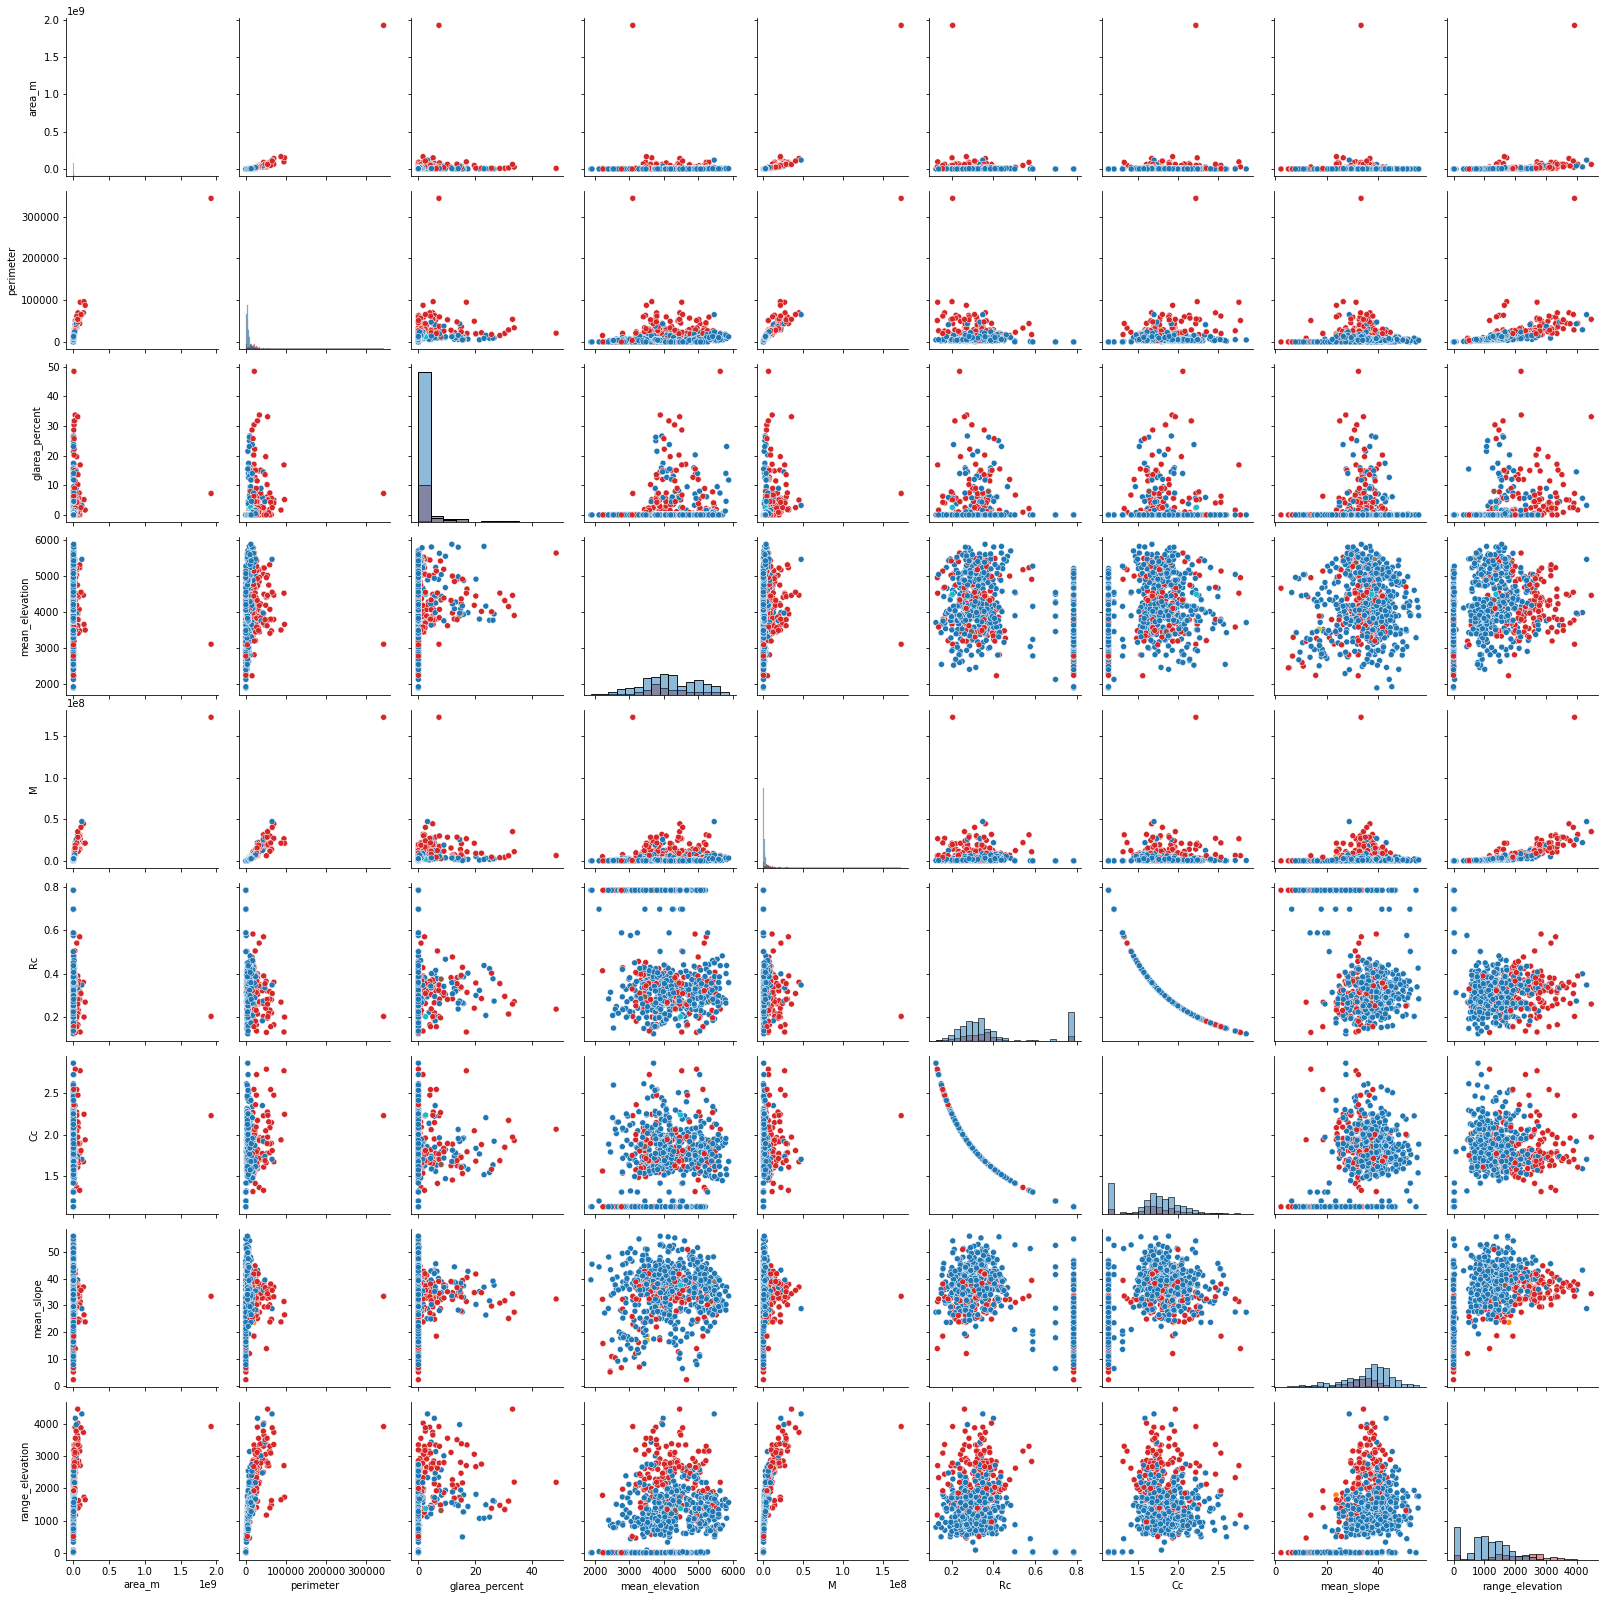

In [44]:
## test with fewer params 

# table_sub2 = table[['Name', 'area_m', 'perimeter',
#        'glarea_percent', 'mean_elevation', 'M', 'Rc',
#        'Cc', 'mean_slope', 'range_elevation']]

# g = sns.PairGrid(table_sub2, hue = 'Name')
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

# plt.savefig('params_scatter_sub.png', dpi = 300, bbox_inches = 'tight')



In [46]:
# table_sub2 = table[['Name', 'area_m', 'perimeter',
#        'glarea_percent', 'mean_elevation', 'M', 'Rc',
#        'Cc', 'mean_slope', 'range_elevation', 'region']]

# g = sns.PairGrid(table_sub2, hue = 'region')
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)



In [47]:
# make loop to save histograms for each parameter dor different 'name' (ff/df) 

In [15]:
table.head()

,DN,Name,x_centroid,y_centroid,area_m,perimeter,glaciersum,mean_elevation,median_elevation,std_elevation,...,max_slope,range_slope,variance_slope,glarea_percent,glacier,x_wgs,y_wgs,M,Rc,Cc
0,2,DF,6533932.497,-500205.440,323908.568,3584.675,0.000,4738.964789,4764.5,184.324936,...,73.454002,68.675880,189.262607,0.00000,0,85.622,28.207,5.082328e+05,0.316762,1.789410
1,3,DF,6534113.836,-500799.045,182483.700,2922.889,0.000,4568.158333,4594.5,148.640450,...,69.205093,66.178936,239.110864,0.00000,0,85.617,28.205,2.584446e+05,0.268417,1.943889
2,4,DF,6533894.325,-503821.445,205294.163,2702.293,0.000,4182.414815,4179.0,149.451064,...,49.839001,37.792932,58.833395,0.00000,0,85.591,28.205,2.854492e+05,0.353282,1.694398
3,5,"Mixed - new looks FF, vegetated DF",6531952.768,-502250.739,8413968.867,19907.851,2763.123,4867.525384,4886.5,386.837657,...,59.196445,58.829133,129.789809,0.03284,1,85.603,28.226,5.212530e+06,0.266785,1.949823
4,7,FF - lower lef DF remnants?,6535837.722,-503989.910,359644.959,3750.121,0.000,4346.589852,4321.0,195.953906,...,58.032841,51.812997,91.630189,0.00000,0,85.591,28.184,4.587736e+05,0.321361,1.776559


# climate

In [126]:
## read all temperatures

df = pd.read_csv('/Users/varyabazilova/Desktop/alluvial_fans/dem_all/all_points_so_far/10_datawrangl_formodel!!/morphometrical_params.csv', sep = ';', index_col = 0)
df = df[df.target.isin([1,0])]

In [129]:
len(df.drop_duplicates())

712

### mean annual temperature 

In [111]:
# ## -------- mean of all - for one file: 

# # read data 
# climatetemp = xr.open_mfdataset('/Users/varyabazilova/Desktop/era5land/points_coordinates_daymean/*.nc')
# # climatetemp = climatetemp.drop(labels='time_bnds')

# # lats = table.y_wgs
# # lons = table.x_wgs
# # tempsel = climatemp.sel(

# # mean across time:
# climatetemp_mean = climatetemp.mean(dim = 'time')
# # to df
# mean_df = climatetemp_mean.to_dataframe().drop_duplicates().reset_index()
# # rename things
# mean_df1 = mean_df.rename(columns = {'longitude':'x_wgs', 'latitude':'y_wgs'})
# # merge with the rest of the data on the coordinates
# dfclim = df.merge(mean_df1, on=['x_wgs', 'y_wgs'], how='left')#.drop_duplicates()



In [112]:
%%time
# calculate mean annual temperature from daily data for each year: 

path = '/Users/varyabazilova/Desktop/era5land/daymean_temp'

meanannual = xr.Dataset()

for f in os.listdir(path):
    # read every file: 
    ds = xr.open_dataset(os.path.join(path, f), decode_coords="all")
    # drop useless dimention
    ds = ds.drop(labels='time_bnds')
    # group by -> resample to annual 
    dsmean = ds.groupby('time.year').mean('time')
    # print(dsmean)
    # merge 
    meanannual = xr.merge([meanannual, dsmean])

# print(meanannual)

meanannual_mean = meanannual.mean(dim='year')

CPU times: user 20.4 s, sys: 19.5 s, total: 39.9 s
Wall time: 52.3 s


In [113]:
# select coordinates first 

lats = df.y_wgs
lons = df.x_wgs
meanannual_mean_sel = meanannual_mean.sel(latitude = lats, longitude = lons, method = 'nearest')

# overwrite the coordinates for them to match: (ovewrite dimentions)
meanannual_mean_sel['longitude'] = lons.values # x_wgs
meanannual_mean_sel['latitude']= lats.values   # y_wgs

In [114]:
# meanannual_mean_sel.longitude.values - df.x_wgs.values


In [115]:
%%time
# append these values to the table: 
meanannual_mean_sel_df = meanannual_mean_sel.to_dataframe()

len(meanannual_mean_sel_df) **(0.5) 

CPU times: user 8.09 ms, sys: 3.15 ms, total: 11.2 ms
Wall time: 12.6 ms


742.0

In [116]:
meanannual_mean_sel_df = meanannual_mean_sel_df.reset_index()


In [117]:
len(meanannual_mean_sel_df) **(0.5) 

meanannual_mean_sel_df.head()

# df

,longitude,latitude,t2m
0,85.622,28.207,268.451569
1,85.622,28.205,268.451569
2,85.622,28.205,268.451569
3,85.622,28.226,268.451569
4,85.622,28.184,268.451569


In [118]:
# rename things
meanannual_mean_sel_df1 = meanannual_mean_sel_df.rename(columns = {'longitude':'x_wgs', 'latitude':'y_wgs'})

### dfclim - new table with data

In [134]:
# merge with the rest of the data on the coordinates
dfclim = df.merge(meanannual_mean_sel_df1, on=['x_wgs', 'y_wgs'], how='left').drop_duplicates()

# convert from K to C 
dfclim['t2m'] = dfclim.t2m -273.15

dfclim = dfclim.rename(columns = {'t2m':'mean_annual_T'}) 

### mean jan and june temp (coldest month and warmenst month)

In [200]:
%%time
# calculate mean annual temperature from daily data for each year: 

path = '/Users/varyabazilova/Desktop/era5land/daymean_temp'

meanmonth = xr.Dataset()

for f in os.listdir(path):
    # read every file: 
    ds = xr.open_dataset(os.path.join(path, f), decode_coords="all")
    # drop useless dimention
    ds = ds.drop(labels='time_bnds')
    # group by -> resample to annual 
    # dsmean = ds.groupby('time.month').mean('time')
    dsmean = ds.resample(time="1MS").mean(dim="time")
    # print(dsmean)
    # merge 
    meanmonth = xr.merge([meanmonth, dsmean])

# print(meanmonth)

# meanannual_mean = meanannual.mean(dim='year')

CPU times: user 24 s, sys: 11.7 s, total: 35.7 s
Wall time: 49 s


In [201]:
meanmonth = meanmonth.groupby('time.month').mean()
meanmonth_jan = meanmonth.sel(month = 1)
meanmonth_jul = meanmonth.sel(month = 7)

In [202]:
## select coordinates 

# select coordinates first 

lats = df.y_wgs
lons = df.x_wgs

meanmonth_jan_sel = meanmonth_jan.sel(latitude = lats, longitude = lons, method = 'nearest')
meanmonth_jul_sel = meanmonth_jul.sel(latitude = lats, longitude = lons, method = 'nearest')


# overwrite the coordinates for them to match: (ovewrite dimentions)
meanmonth_jan_sel['longitude'] = lons.values # x_wgs
meanmonth_jan_sel['latitude']= lats.values   # y_wgs

meanmonth_jul_sel['longitude'] = lons.values # x_wgs
meanmonth_jul_sel['latitude']= lats.values   # y_wgs




In [203]:
%%time
## ---- jan -----
# to data frame
meanmonth_jan_sel_df = meanmonth_jan_sel.to_dataframe().reset_index()
#rename:
meanmonth_jan_sel_df = meanmonth_jan_sel_df.rename(columns = {'longitude':'x_wgs', 'latitude':'y_wgs'})
# convert from K to C 
meanmonth_jan_sel_df['t2m'] = meanmonth_jan_sel_df.t2m -273.15
#rename column: 
meanmonth_jan_sel_df = meanmonth_jan_sel_df.rename(columns = {'t2m':'mean_jan_T'}) 
# drop month 
meanmonth_jan_sel_df = meanmonth_jan_sel_df.drop('month', axis = 1)


## ---- july -----
meanmonth_jul_sel_df = meanmonth_jul_sel.to_dataframe().reset_index()
meanmonth_jul_sel_df = meanmonth_jul_sel_df.rename(columns = {'longitude':'x_wgs', 'latitude':'y_wgs'})
meanmonth_jul_sel_df['t2m'] = meanmonth_jul_sel_df.t2m -273.15
meanmonth_jul_sel_df = meanmonth_jul_sel_df.rename(columns = {'t2m':'mean_july_T'}) 
meanmonth_jul_sel_df = meanmonth_jul_sel_df.drop('month', axis = 1)





CPU times: user 35.6 ms, sys: 12.1 ms, total: 47.7 ms
Wall time: 46.7 ms


In [206]:
# meanmonth_jan_sel_df
# meanmonth_jul_sel_df

,x_wgs,y_wgs,mean_jan_T
0,85.622,28.207,-13.451904
1,85.622,28.205,-13.451904
2,85.622,28.205,-13.451904
3,85.622,28.226,-13.451904
4,85.622,28.184,-13.451904
...,...,...,...
544639,78.600,33.661,-22.023651
544640,78.600,33.652,-22.023651
544641,78.600,33.651,-22.023651
544642,78.600,33.639,-22.661316


In [209]:
## merge to the dataframe with other stuff

# january
dfclim = dfclim.merge(meanmonth_jan_sel_df, on=['x_wgs', 'y_wgs'], how='left').drop_duplicates()
# july
dfclim = dfclim.merge(meanmonth_jul_sel_df, on=['x_wgs', 'y_wgs'], how='left').drop_duplicates()



/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_jan_T_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
